## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "./Mouse_metadata.csv"
study_results_path = "./Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_data_results = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])

# Display the data table for preview
complete_data_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.

mice_data = complete_data_results["Mouse ID"].count()

mice_data

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

ID_number_data = complete_data_results.groupby(["Mouse ID", "Timepoint"])

print(ID_number_data.head())

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
len(complete_data_results["Mouse ID"].unique())



249

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

complete_data_results[['Mouse ID','Timepoint']].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [6]:
complete_data_results.loc[complete_data_results.duplicated()]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [7]:
new_data_frame = complete_data_results['Mouse ID'].drop_duplicates()

new_data_frame 

0       k403
10      s185
20      x401
30      m601
40      g791
        ... 
1858    z314
1860    z435
1863    z581
1873    z795
1883    z969
Name: Mouse ID, Length: 249, dtype: object

In [8]:
# Checking the number of mice in the clean DataFrame.
new_mice_number = complete_data_results["Mouse ID"].count()
new_mice_number

1893

## Summary Statistics

In [9]:
# mean of the tumor volume for each regimen

tumor_vols_mean = complete_data_results.groupby(["Drug Regimen", "Timepoint"]).mean()["Tumor Volume (mm3)"]

tumor_vols_mean = pd.DataFrame(tumor_vols_mean)

tumor_vols_mean



Tumor Volume (mm3)
Drug Regimen Timepoint                    
Capomulin    0                   45.000000
             5                   44.266086
             10                  43.084291
             15                  42.064317
             20                  40.716325
...                                    ...
Zoniferol    25                  55.432935
             30                  57.713531
             35                  60.089372
             40                  62.916692
             45                  65.960888

[100 rows x 1 columns]

In [10]:
#Standard Error
tumor_vols_sem = complete_data_results.groupby(["Drug Regimen", "Timepoint"]).sem() ["Tumor Volume (mm3)"]
tumor_vols_sem = pd.DataFrame(tumor_vols_sem)
tumor_vols_sem

Tumor Volume (mm3)
Drug Regimen Timepoint                    
Capomulin    0                    0.000000
             5                    0.448593
             10                   0.702684
             15                   0.838617
             20                   0.909731
...                                    ...
Zoniferol    25                   0.602513
             30                   0.800043
             35                   0.881426
             40                   0.998515
             45                   1.003576

[100 rows x 1 columns]

In [11]:
#Merging the two data points above
tumor_vols_mean = tumor_vols_mean.reset_index()
tumor_vols_pivot_mean = tumor_vols_mean.pivot(index="Timepoint", columns="Drug Regimen")

tumor_vols_sem = tumor_vols_sem.reset_index()
tumor_vols_pivot_sem = tumor_vols_sem.pivot(index="Timepoint", columns="Drug Regimen")["Tumor Volume (mm3)"]

tumor_vols_pivot_mean.head()

Tumor Volume (mm3)                                              \
Drug Regimen          Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                     
0                     45.000000  45.000000  45.000000  45.000000  45.000000   
5                     44.266086  46.503051  46.541247  47.389175  46.796098   
10                    43.084291  48.285125  49.403909  49.582269  48.694210   
15                    42.064317  50.094055  51.296397  52.399974  50.933018   
20                    40.716325  52.157049  53.197691  54.920935  53.644087   

                                                                     
Drug Regimen    Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                            
0             45.000000  45.000000  45.000000  45.000000  45.000000  
5             47.125589  47.248967  43.944859  47.470830  46.851818  
10            49.423329  49.101541  42.531957  49.335368  48.689881  
15            51.359742  51.067318  41.495061  51.448025  50.779059  
20            54.364417  53.346737  40.238325  53.970080  53.170334

In [13]:
#median of the tumor volume for each regimen
tumor_vols_median = complete_data_results.groupby(["Drug Regimen", "Timepoint"]).median()["Tumor Volume (mm3)"]
tumor_vols_median

Drug Regimen  Timepoint
Capomulin     0            45.000000
              5            45.597064
              10           43.421014
              15           42.798160
              20           40.716428
                             ...    
Zoniferol     25           55.676604
              30           57.419744
              35           60.365832
              40           62.274543
              45           65.684689
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [14]:
#standard deviation of the tumor volume for each regimen

tumor_vols_std = complete_data_results.groupby(["Drug Regimen", "Timepoint"]).std()["Tumor Volume (mm3)"]
tumor_vols_std

Drug Regimen  Timepoint
Capomulin     0            0.000000
              5            2.242964
              10           3.513422
              15           4.108369
              20           4.362915
                             ...   
Zoniferol     25           2.410052
              30           3.098552
              35           3.297993
              40           3.736102
              45           3.755037
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [17]:
#Variance of the tumor volume for each regimen

tumor_vols_var = complete_data_results.groupby(["Drug Regimen", "Timepoint"]).var()["Tumor Volume (mm3)"]
tumor_vols_var


Drug Regimen  Timepoint
Capomulin     0             0.000000
              5             5.030889
              10           12.344133
              15           16.878693
              20           19.035028
                             ...    
Zoniferol     25            5.808348
              30            9.601024
              35           10.876760
              40           13.958456
              45           14.100301
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [37]:
# Using the aggregation method, produce the same summary statistics in a single line
tumor_vols_mean = tumor_vols_mean.reset_index()
tumor_vols_pivot_mean = tumor_vols_mean.pivot(index="Timepoint", columns="Drug Regimen")["Tumor Volume (mm3)"]

tumor_vols_sem = tumor_vols_sem.reset_index()
tumor_vols_pivot_sem = tumor_vols_sem.pivot(index="Timepoint", columns="Drug Regimen")["Tumor Volume (mm3)"]

tumor_vols_median = tumor_vols_median.reset_index()
tumor_vols_pivot_median = tumor_vols_median.pivot(index="Timepoint", columns="Drug Regimen")["Tumor Volume (mm3)"]


tumor_vols_std = tumor_vols_std.reset_index()
tumor_vols_pivot_std = tumor_vols_std.pivot(index="Timepoint", columns="Drug Regimen")["Tumor Volume (mm3)"]


tumor_vols_var = tumor_vols_var.reset_index()
tumor_vols_pivot_var = tumor_vols_var.pivot(index="Timepoint", columns="Drug Regimen")["Tumor Volume (mm3)"]



tumor_vols_pivot_mean.head()

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,46.541247,47.389175,46.796098,47.125589,47.248967,43.944859,47.470830,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.335368,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.448025,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,53.970080,53.170334


## Bar and Pie Charts

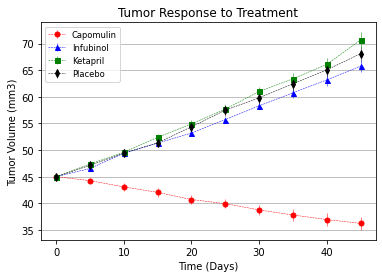

In [42]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Capomulin"], yerr=tumor_vols_pivot_sem["Capomulin"],
             color='r', marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Infubinol"], yerr=tumor_vols_pivot_sem["Infubinol"],
                color='b', marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Ketapril"], yerr=tumor_vols_pivot_sem["Ketapril"],
                color='g', marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Placebo"], yerr=tumor_vols_pivot_sem["Placebo"],
                color='k', marker="d", markersize=5, linestyle="dashed", linewidth=0.50)
plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(axis='y')
plt.legend(["Capomulin", "Infubinol", "Ketapril", "Placebo"], loc="best", fontsize="small", fancybox=True)


In [33]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
 bmnvv rtyuhnb # Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.



TypeError: 'numpy.int64' object is not iterable

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
